In [1]:
# Load the saved covariance matrices and means
import numpy as np

# Load the saved files
covmats_raw = np.load("D:\\datasets\\saved_features\\global_pooled_covmats.npz")
means_raw = np.load("D:\\datasets\\saved_features\\global_means.npz")

# Convert to numpy arrays
covmats = {key: covmats_raw[key] for key in covmats_raw.files}
means = {key: means_raw[key] for key in means_raw.files}


In [2]:
covmats = np.array(covmats)
covmats

array({'hand_feat_cov': array([[0.48277307, 0.1911939 , 0.15258466, ..., 0.25893998, 0.52225244,
        0.1443754 ],
       [0.1911939 , 0.08333486, 0.06520358, ..., 0.11182386, 0.2246229 ,
        0.05842133],
       [0.15258466, 0.06520358, 0.05156219, ..., 0.08782491, 0.17694221,
        0.04636971],
       ...,
       [0.25893998, 0.11182386, 0.08782491, ..., 0.15218227, 0.30403656,
        0.07867068],
       [0.52225244, 0.2246229 , 0.17694221, ..., 0.30403656, 0.61748964,
        0.15848327],
       [0.1443754 , 0.05842133, 0.04636971, ..., 0.07867068, 0.15848327,
        0.04365172]], dtype=float32), 'body_feat_cov': array([[0.00801957, 0.00498726, 0.00566461, ..., 0.00659265, 0.00750756,
        0.00620411],
       [0.00498726, 0.02492185, 0.01190812, ..., 0.0042432 , 0.00170725,
        0.00706425],
       [0.00566461, 0.01190812, 0.01807459, ..., 0.00738154, 0.00614265,
        0.01070724],
       ...,
       [0.00659265, 0.0042432 , 0.00738154, ..., 0.00822482, 0.00814228,

In [17]:
intrinsic_dim = np.linalg.matrix_rank(covmats.item()['hand_feat_cov'])
print(f"Intrinsic dimensionality: {intrinsic_dim}")

Intrinsic dimensionality: 7


In [18]:
intrinsic_dim = np.linalg.matrix_rank(covmats.item()['body_feat_cov'])
print(f"Intrinsic dimensionality: {intrinsic_dim}")

Intrinsic dimensionality: 175


Total dimensions: 2048
Dimensions with non-zero variance (>1e-10): 1265


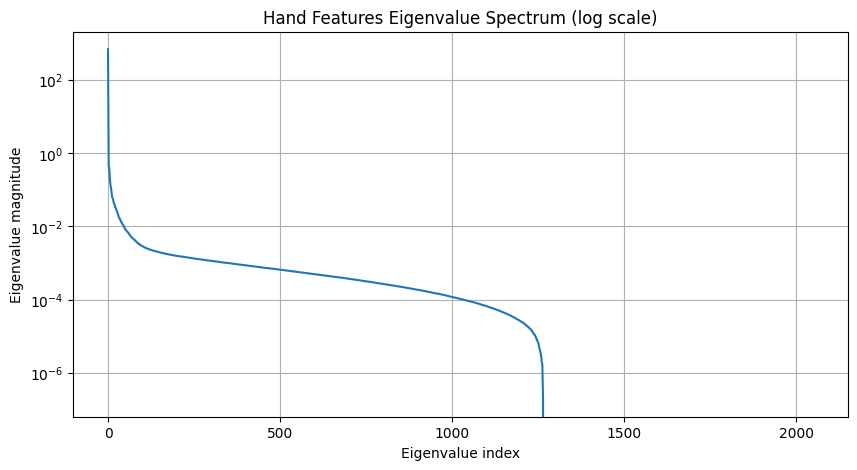

In [36]:
# Get eigenvalues and eigenvectors for hand features covariance matrix
eigenvals, eigenvecs = np.linalg.eigh(covmats.item()['hand_feat_cov'])

# Sort in descending order since eigh returns ascending
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

# Count dimensions with non-negligible variance
# Using a small threshold to account for numerical precision
epsilon = 1e-10
nonzero_dims = np.sum(eigenvals > epsilon)

print(f"Total dimensions: {len(eigenvals)}")
print(f"Dimensions with non-zero variance (>1e-10): {nonzero_dims}")

# Plot eigenvalue spectrum
plt.figure(figsize=(10, 5))
plt.semilogy(eigenvals)
plt.title('Hand Features Eigenvalue Spectrum (log scale)')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue magnitude')
plt.grid(True)
plt.show()


[0.9709213 0.9948293 0.9954438 ... 1.0000069 1.0000033 0.9999994]
Total dimensions: 2048
Dimensions with non-zero variance (>1e-10): 1265
Effective rank (99% explained variance): 2048


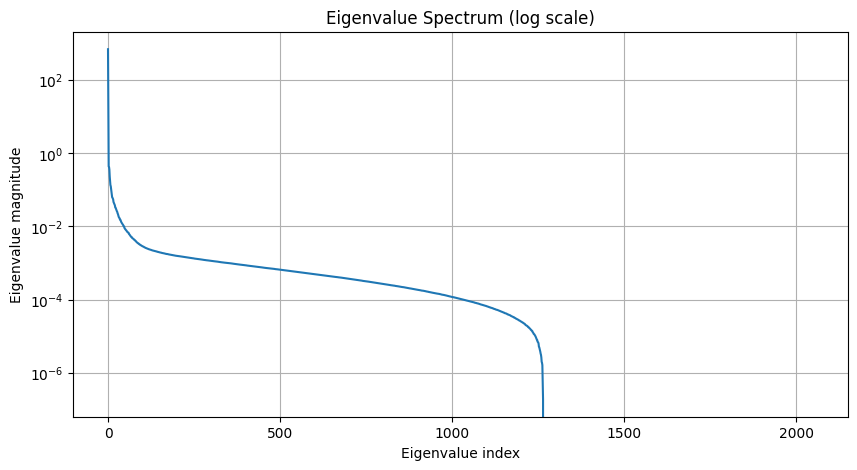

In [15]:
# Load and analyze eigenvalues of hand features covariance matrix
hand_eigenvals = np.load("D:\\datasets\\saved_features\\hand_eigenvals.npy")

# Count dimensions with non-negligible variance 
# Using a small threshold to account for numerical precision
epsilon = 1e-10
nonzero_dims = np.sum(hand_eigenvals > epsilon)

# Analyze cumulative explained variance to determine effective rank
total_variance = np.sum(hand_eigenvals)
cumulative_variance_ratio = np.cumsum(hand_eigenvals) / total_variance
print(cumulative_variance_ratio)
# Find number of dimensions needed to explain 99% of variance
effective_rank_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1

print(f"Total dimensions: {len(hand_eigenvals)}")
print(f"Dimensions with non-zero variance (>1e-10): {nonzero_dims}")
print(f"Effective rank (99% explained variance): {effective_rank_99}")

# Plot eigenvalue spectrum
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.semilogy(hand_eigenvals)
plt.title('Eigenvalue Spectrum (log scale)')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue magnitude')
plt.grid(True)
plt.show()

In [3]:
# Get eigenvalues and eigenvectors for body features covariance matrix
eigenvals, eigenvecs = np.linalg.eigh(covmats['body_feat_cov'])

# Sort in descending order since eigh returns ascending
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

print("Eigenvalues shape:", eigenvals.shape)
print("Eigenvectors shape:", eigenvecs.shape)

# Print first few eigenvalues
print("\nFirst 5 eigenvalues:")
print(eigenvals[:5])

# Save eigenvalues and eigenvectors
save_dir = "D:\\datasets\\saved_features"
np.save(f"{save_dir}\\body_eigenvals.npy", eigenvals)
np.save(f"{save_dir}\\body_eigenvecs.npy", eigenvecs)

# Return both for further analysis
eigenvals, eigenvecs

Eigenvalues shape: (2048,)
Eigenvectors shape: (2048, 2048)

First 5 eigenvalues:
[15.326962   9.567182   3.502748   2.0738482  1.3270019]


(array([1.5326962e+01, 9.5671816e+00, 3.5027480e+00, ..., 2.0868400e-05,
        1.9571364e-05, 1.5566933e-05], dtype=float32),
 array([[ 0.00981163, -0.02337089, -0.00650925, ...,  0.00268461,
         -0.00891041,  0.00066869],
        [ 0.03155557, -0.00255538,  0.01662205, ..., -0.00015008,
          0.0029226 , -0.00146247],
        [ 0.02749006, -0.00448867, -0.0250241 , ..., -0.00803019,
         -0.01082843,  0.000249  ],
        ...,
        [ 0.01176357, -0.02014462, -0.0094686 , ...,  0.00281011,
         -0.00393045,  0.00224942],
        [ 0.00771399, -0.02802587, -0.01397721, ..., -0.0041692 ,
          0.00238124, -0.00530365],
        [ 0.01957081, -0.01554192, -0.01009891, ...,  0.00851697,
         -0.00219516,  0.00353534]], dtype=float32))

In [14]:
# Get eigenvalues and eigenvectors for hand features covariance matrix
eigenvals, eigenvecs = np.linalg.eigh(covmats['hand_feat_cov'])

# Sort in descending order since eigh returns ascending
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvecs = eigenvecs[:,idx]

print("Eigenvalues shape:", eigenvals.shape)
print("Eigenvectors shape:", eigenvecs.shape)

# Print first few eigenvalues
print("\nFirst 5 eigenvalues:")
print(eigenvals[:5])

# Save eigenvalues and eigenvectors
save_dir = "D:\\datasets\\saved_features"
np.save(f"{save_dir}\\hand_eigenvals.npy", eigenvals)
np.save(f"{save_dir}\\hand_eigenvecs.npy", eigenvecs)

# Return both for further analysis
eigenvals, eigenvecs

Eigenvalues shape: (2048,)
Eigenvectors shape: (2048, 2048)

First 5 eigenvalues:
[6.8248108e+02 1.6805464e+01 4.3191949e-01 4.1864729e-01 3.5701412e-01]


(array([ 6.8248108e+02,  1.6805464e+01,  4.3191949e-01, ...,
        -2.3252114e-03, -2.5761800e-03, -2.7250939e-03], dtype=float32),
 array([[ 0.0262914 , -0.02486934,  0.0139438 , ..., -0.00429647,
          0.00658924, -0.0594914 ],
        [ 0.01089755,  0.00963037, -0.01453058, ...,  0.00459649,
         -0.00923639, -0.00275586],
        [ 0.00862977,  0.0051047 , -0.01152768, ..., -0.00136341,
         -0.00172014,  0.00347151],
        ...,
        [ 0.01472806,  0.01293843, -0.00974025, ...,  0.00959855,
         -0.00884967, -0.0170371 ],
        [ 0.02967843,  0.02532498, -0.00174496, ...,  0.07240907,
         -0.01402291, -0.01939504],
        [ 0.00793499, -0.00500255, -0.00694331, ..., -0.00326267,
         -0.0077187 ,  0.00232033]], dtype=float32))

In [2]:
# Load the saved covariance matrices and means
import numpy as np

# Load the saved files
covmats_raw = np.load("D:\datasets\saved_features\spatial_covmats_body.npz")
means_raw = np.load("D:\\datasets\\saved_features\\global_means.npz")

# Convert to numpy arrays
covmats = {key: covmats_raw[key] for key in covmats_raw.files}
means = {key: means_raw[key] for key in means_raw.files}


In [3]:
save_dir = "D:\\datasets\\saved_features"

In [5]:

eigendict = {}
for key in covmats.keys():
    if "body_feat_cov" in key:
        eigenvals, eigenvecs = np.linalg.eigh(covmats[key])
        idx = eigenvals.argsort()[::-1]
        eigenvals = eigenvals[idx]
        eigenvecs = eigenvecs[:,idx]
        eigendict[key] = {"eigenvals": eigenvals, "eigenvecs": eigenvecs}

# Save eigendict to npz file
np.savez(f"{save_dir}\\spatial_eigenvalues.npz", **eigendict)

In [10]:
eigendict.keys()

dict_keys(['body_feat_cov_0_0', 'body_feat_cov_0_1', 'body_feat_cov_0_2', 'body_feat_cov_0_3', 'body_feat_cov_0_4', 'body_feat_cov_0_5', 'body_feat_cov_1_0', 'body_feat_cov_1_1', 'body_feat_cov_1_2', 'body_feat_cov_1_3', 'body_feat_cov_1_4', 'body_feat_cov_1_5', 'body_feat_cov_2_0', 'body_feat_cov_2_1', 'body_feat_cov_2_2', 'body_feat_cov_2_3', 'body_feat_cov_2_4', 'body_feat_cov_2_5', 'body_feat_cov_3_0', 'body_feat_cov_3_1', 'body_feat_cov_3_2', 'body_feat_cov_3_3', 'body_feat_cov_3_4', 'body_feat_cov_3_5', 'body_feat_cov_4_0', 'body_feat_cov_4_1', 'body_feat_cov_4_2', 'body_feat_cov_4_3', 'body_feat_cov_4_4', 'body_feat_cov_4_5', 'body_feat_cov_5_0', 'body_feat_cov_5_1', 'body_feat_cov_5_2', 'body_feat_cov_5_3', 'body_feat_cov_5_4', 'body_feat_cov_5_5', 'body_feat_cov_6_0', 'body_feat_cov_6_1', 'body_feat_cov_6_2', 'body_feat_cov_6_3', 'body_feat_cov_6_4', 'body_feat_cov_6_5', 'body_feat_cov_7_0', 'body_feat_cov_7_1', 'body_feat_cov_7_2', 'body_feat_cov_7_3', 'body_feat_cov_7_4', 'b

In [24]:
eigen_raw = np.load(f"{save_dir}\\spatial_eigenvalues.npz", allow_pickle=True)
eigen = {key: eigen_raw[key] for key in eigen_raw.files}

In [25]:
eigen.keys()

dict_keys(['body_feat_cov_0_0', 'body_feat_cov_0_1', 'body_feat_cov_0_2', 'body_feat_cov_0_3', 'body_feat_cov_0_4', 'body_feat_cov_0_5', 'body_feat_cov_1_0', 'body_feat_cov_1_1', 'body_feat_cov_1_2', 'body_feat_cov_1_3', 'body_feat_cov_1_4', 'body_feat_cov_1_5', 'body_feat_cov_2_0', 'body_feat_cov_2_1', 'body_feat_cov_2_2', 'body_feat_cov_2_3', 'body_feat_cov_2_4', 'body_feat_cov_2_5', 'body_feat_cov_3_0', 'body_feat_cov_3_1', 'body_feat_cov_3_2', 'body_feat_cov_3_3', 'body_feat_cov_3_4', 'body_feat_cov_3_5', 'body_feat_cov_4_0', 'body_feat_cov_4_1', 'body_feat_cov_4_2', 'body_feat_cov_4_3', 'body_feat_cov_4_4', 'body_feat_cov_4_5', 'body_feat_cov_5_0', 'body_feat_cov_5_1', 'body_feat_cov_5_2', 'body_feat_cov_5_3', 'body_feat_cov_5_4', 'body_feat_cov_5_5', 'body_feat_cov_6_0', 'body_feat_cov_6_1', 'body_feat_cov_6_2', 'body_feat_cov_6_3', 'body_feat_cov_6_4', 'body_feat_cov_6_5', 'body_feat_cov_7_0', 'body_feat_cov_7_1', 'body_feat_cov_7_2', 'body_feat_cov_7_3', 'body_feat_cov_7_4', 'b

In [27]:
eigen["body_feat_cov_0_0"].item().keys()

dict_keys(['eigenvals', 'eigenvecs'])